In [2]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## 1. 再次強調不要用迴圈

資料分析很重要的一個概念就是「不到最後關頭, 絕不輕言用 `for` 迴圈」。現在我們來舉個例子品味一下。假設有個班級, 同學學期成績如下:

In [3]:
grades = [77, 85, 66, 98, 0, 74, 90]

現在老師要算平均, `for` 迴圈是這樣算的。

In [4]:
total = 0

for s in grades:
    total = total + s
    
print(total/len(grades))

70.0


老師覺得大家表現其實還不錯 (除了那位都沒出現所以 0 分的同學), 因此他決定每個人加 5 分, 然後再放入一個 list。於是... 又要一個 list...

In [6]:
newgrades = []

for s in grades:
    newgrades.append(s+5)

In [7]:
newgrades

[82, 90, 71, 103, 5, 79, 95]

來來, 現在我們看陣列版。

In [8]:
garr = np.array(grades)

In [9]:
garr

array([77, 85, 66, 98,  0, 74, 90])

算平均。

In [10]:
garr.mean()

70.0

雖然我不知算全班總分要做什麼, 不過我們當然也可以瞬間算出來!

In [11]:
garr.sum()

490

全班加 5 分也太容易。

In [12]:
garr + 5

array([ 82,  90,  71, 103,   5,  79,  95])

## 2. 陣列比我們想像中更強!

一般的成績計算, 大概有點像這樣:

* 平時佔 40%
* 期中考 30%
* 期末考 30%

一位同學平時成績 (可能很少來上課), 期中考, 期末考是這樣...

In [14]:
g = np.array([40, 70, 25])

依我們的規定設加權比例。

In [15]:
w = np.array([0.4, 0.3, 0.3])

一次算出來 (雖然看來有點複雜)!

In [16]:
(g*w).sum()

44.5

其實這就是在算 dot product!

In [17]:
np.dot(g, w)

44.5

## 3. 陣列不一定要一階!

我們來看最平常的一階陣列, 也就是一般的 n 維向量!

我們也叫一階 tensor!

In [18]:
x = np.array([1,3,6,7])

In [19]:
x

array([1, 3, 6, 7])

同樣維度的好幾個一階陣列, 就是二階陣列。比如說有三位同學的平時、期中、期末成績如下。

In [20]:
x = np.array( [[40, 70, 25], [75, 80, 65], [80, 90, 100]])

事實上你可能也發現, 二階陣列就是個矩陣, 也叫二階 tensor。我們當然可以有三階、四階...

In [21]:
x

array([[ 40,  70,  25],
       [ 75,  80,  65],
       [ 80,  90, 100]])

In [22]:
x

array([[ 40,  70,  25],
       [ 75,  80,  65],
       [ 80,  90, 100]])

記得矩陣就是先列後行, 所以我們要找出第 1 列, 第 2 行元素 (記得 Python 都從 0 開始算), 就是這樣:

In [25]:
x[1,2]

65

第 1 列所有元素是這樣。

In [23]:
x[1, :]

array([75, 80, 65])

第 2 行所有元素。

In [24]:
x[:, 2]

array([ 25,  65, 100])

## 4. 你可能不知道但很重要的 `reshape`

我們可以看一下 `x` 的 `shape`。

In [28]:
x.shape

(3, 3)

在資料分析中有種種原因我們要重設 `shape`, 我們可用 `reshape`。

In [25]:
x.reshape(1,9)

array([[ 40,  70,  25,  75,  80,  65,  80,  90, 100]])

拉平也是常用的!

In [26]:
x.ravel()

array([ 40,  70,  25,  75,  80,  65,  80,  90, 100])

注意不管是 `reshape` 或是 `ravel` 其實都沒有改變原來 x 的樣子, 要改變可以像這樣:

In [27]:
m = np.random.randn(100)

In [29]:
m = m.reshape(10,10)

In [30]:
m.shape

(10, 10)

或是用另一個變數「接」。

In [31]:
m2 = m.ravel()

In [32]:
m2.shape

(100,)

用 `range` 我們可以快速造出一個 list, 而 array 版的 `range` 是 `arange`。

In [33]:
y = np.arange(10)

In [34]:
y

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

`arange` 其實更有彈性, 因為浮點數也可以!

In [35]:
y = np.arange(2.3, 8.2, 0.2)

In [36]:
y

array([ 2.3,  2.5,  2.7,  2.9,  3.1,  3.3,  3.5,  3.7,  3.9,  4.1,  4.3,
        4.5,  4.7,  4.9,  5.1,  5.3,  5.5,  5.7,  5.9,  6.1,  6.3,  6.5,
        6.7,  6.9,  7.1,  7.3,  7.5,  7.7,  7.9,  8.1])

基本的看看 y 的大小、改變 shape 等等。

In [37]:
len(y)

30

In [38]:
y.shape

(30,)

In [39]:
y.shape = (3,10)

In [40]:
y

array([[ 2.3,  2.5,  2.7,  2.9,  3.1,  3.3,  3.5,  3.7,  3.9,  4.1],
       [ 4.3,  4.5,  4.7,  4.9,  5.1,  5.3,  5.5,  5.7,  5.9,  6.1],
       [ 6.3,  6.5,  6.7,  6.9,  7.1,  7.3,  7.5,  7.7,  7.9,  8.1]])

快速令一串 0 的 array。

In [41]:
z = np.zeros(10)

In [42]:
z

array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.])

一階陣列常常要改成下列的形式!

In [43]:
z.reshape(len(z),1)

array([[ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.]])

## 5. `axis` 指出計算方向

In [44]:
x = np.arange(10)

In [45]:
x

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [46]:
x = x.reshape(2,5)

In [47]:
x

array([[0, 1, 2, 3, 4],
       [5, 6, 7, 8, 9]])

我們當然可以全部相加!

In [48]:
x.sum()

45

我們也可以一列一列加或一行一行加。這個用 `axis=0`, 或 `axis=1` 
決定。依「先列後行」原則, 我們可以猜到 `axis=0` 是一列一列做運算!

![axis=0](images/axis0.png)

In [51]:
x.sum(axis=0)

array([ 5,  7,  9, 11, 13])

`axis=1` 是一行一行加起來!

![axis=1](images/axis1.png)

In [61]:
x.sum(axis=1)

array([10, 35])

## 6. 熊貓來了!

Pandas 可以想成是 Python 的 Excel, 但又更有彈性、更方便!

Pandas 基本上有兩種資料結構, 一是 DataFrame, 可以想成一個 table; 另一個是 `Series`, 是個有點像 `array` 或 `list` 的形態。

我們先讀入練習檔案, 做成一個 DataFrame。

In [52]:
df = pd.read_csv("http://bit.ly/gradescsv")

看看前幾筆資料長怎麼樣, 這大概是最常用的指令。

In [53]:
df.head()

,姓名,國文,英文,數學,自然,社會
0,劉俊安,9,10,15,10,13
1,胡玉華,10,10,10,8,9
2,黃淑婷,13,15,8,11,14
3,陳上紫,10,10,8,9,14
4,崔靜成,13,12,14,12,13


也可以看最後幾筆資料。

In [54]:
df.tail()

,姓名,國文,英文,數學,自然,社會
95,蔡佳燕,9,10,9,13,14
96,吳筱婷,8,10,14,10,15
97,陳家銘,14,9,11,8,12
98,李明威,15,9,8,9,15
99,農揚勇,9,11,12,12,10


我們只要看「數學」那行的資料, 標準用法是

    df["數學"]
    
然後我們可以像 `array` 那樣, 算平均啦等等的。

In [56]:
df["數學"].mean()

11.57

也可以一次看兩行, 記得這樣的話要用個 list 列出所有要看的行。

In [57]:
df[["英文", "數學"]]

,英文,數學
0,10,15
1,10,10
2,15,8
3,10,8
4,12,14
5,12,12
6,13,10
7,9,10
8,9,12
9,15,12


另一個更方便的方法是用

    df.數學

In [58]:
df.數學.mean()

11.57

畫圖也可以 (但我們不知要畫這圖做什麼)。

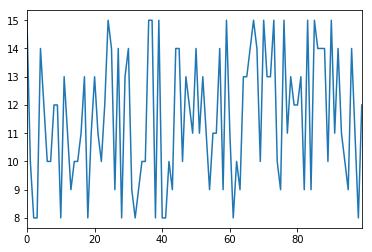

In [59]:
df.數學.plot()

直方圖可能更有點道理。

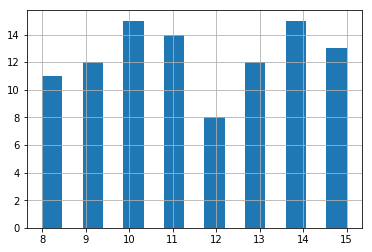

In [77]:
df.數學.hist(bins=15)

更多統計數據也容易算。

In [79]:
df.數學.std()

2.310516143307562

In [80]:
df.describe()

,國文,英文,數學,自然,社會
count,100.000000,100.000000,100.000000,100.00000,100.00000
mean,11.390000,11.380000,11.570000,11.03000,11.83000
std,2.196853,2.273164,2.310516,2.21772,2.48655
min,8.000000,8.000000,8.000000,8.00000,8.00000
25%,9.000000,9.000000,10.000000,9.00000,9.00000
50%,11.000000,11.000000,11.000000,11.00000,12.00000
75%,13.000000,13.000000,14.000000,13.00000,14.00000
max,15.000000,15.000000,15.000000,15.00000,15.00000


In [81]:
df.corr()

,國文,英文,數學,自然,社會
國文,1.000000,0.160158,-0.310899,-0.110236,-0.028421
英文,0.160158,1.000000,0.025656,0.113929,-0.063512
數學,-0.310899,0.025656,1.000000,0.014371,0.041651
自然,-0.110236,0.113929,0.014371,1.000000,-0.156594
社會,-0.028421,-0.063512,0.041651,-0.156594,1.000000


## 7. 增加一行資料

In [60]:
df.head()

,姓名,國文,英文,數學,自然,社會
0,劉俊安,9,10,15,10,13
1,胡玉華,10,10,10,8,9
2,黃淑婷,13,15,8,11,14
3,陳上紫,10,10,8,9,14
4,崔靜成,13,12,14,12,13


我們增加個沒用的一行, 注意這也有陣列導向的味道。

In [61]:
df["沒用"] = 1

In [62]:
df.head()

,姓名,國文,英文,數學,自然,社會,沒用
0,劉俊安,9,10,15,10,13,1
1,胡玉華,10,10,10,8,9,1
2,黃淑婷,13,15,8,11,14,1
3,陳上紫,10,10,8,9,14,1
4,崔靜成,13,12,14,12,13,1


刪掉一行的方式是用 `drop`, 而 `inplace=True` 才會真的改這個 DataFrame 的內容。

In [63]:
df.drop("沒用", axis=1, inplace=True)

In [64]:
df.head()

,姓名,國文,英文,數學,自然,社會
0,劉俊安,9,10,15,10,13
1,胡玉華,10,10,10,8,9
2,黃淑婷,13,15,8,11,14
3,陳上紫,10,10,8,9,14
4,崔靜成,13,12,14,12,13


插播一下, `pandas` 最常用到功能之一是整理我們的數據, 找出我們要的部份,　做成 NumPy array, 再用其他工具分析, 或是做機器學習。

In [65]:
dfs = df[:5]

In [66]:
dfs[["國文", "英文", "數學"]].values

array([[ 9, 10, 15],
       [10, 10, 10],
       [13, 15,  8],
       [10, 10,  8],
       [13, 12, 14]])

回到我們的例子, 我們來算總級分, 注意加的方向!

In [67]:
df.head()

,姓名,國文,英文,數學,自然,社會
0,劉俊安,9,10,15,10,13
1,胡玉華,10,10,10,8,9
2,黃淑婷,13,15,8,11,14
3,陳上紫,10,10,8,9,14
4,崔靜成,13,12,14,12,13


In [68]:
df["總級分"] = df.sum(axis=1)

In [69]:
df.head()

,姓名,國文,英文,數學,自然,社會,總級分
0,劉俊安,9,10,15,10,13,57
1,胡玉華,10,10,10,8,9,47
2,黃淑婷,13,15,8,11,14,61
3,陳上紫,10,10,8,9,14,51
4,崔靜成,13,12,14,12,13,64


也許某些科目我們得重要要特別考慮!

In [70]:
df["加權"] = df.英文*1.5 + df.數學 * 2

In [71]:
df.head()

,姓名,國文,英文,數學,自然,社會,總級分,加權
0,劉俊安,9,10,15,10,13,57,45.0
1,胡玉華,10,10,10,8,9,47,35.0
2,黃淑婷,13,15,8,11,14,61,38.5
3,陳上紫,10,10,8,9,14,51,31.0
4,崔靜成,13,12,14,12,13,64,46.0


## 8. 排序

排序是這樣做, 再次注意這不會改變原來的 DataFrame。

In [72]:
df.sort_values(by="總級分", ascending=False).head()

,姓名,國文,英文,數學,自然,社會,總級分,加權
80,施雅鈴,13,15,12,13,13,66,46.5
12,李正偉,11,15,11,14,15,66,44.5
54,陳怡潔,15,15,9,15,11,65,40.5
25,蔡亦瑄,13,13,14,13,12,65,47.5
57,胡淳茜,12,15,14,13,11,65,50.5


我們也可以用兩個以上的參考值。下面是先比加權分數, 同分再用總級分分高低。

In [73]:
df2 = df.sort_values(by=["加權", "總級分"], ascending=False)

In [74]:
df2.head()

,姓名,國文,英文,數學,自然,社會,總級分,加權
73,吳志遠,13,15,15,8,8,59,52.5
83,李士賢,10,14,15,13,13,65,51.0
57,胡淳茜,12,15,14,13,11,65,50.5
36,詹威德,12,13,15,10,14,64,49.5
70,葉儀依,9,13,15,8,14,59,49.5


重設 index!

In [75]:
df2.index = range(1,101)
     

In [76]:
df2.head()

,姓名,國文,英文,數學,自然,社會,總級分,加權
1,吳志遠,13,15,15,8,8,59,52.5
2,李士賢,10,14,15,13,13,65,51.0
3,胡淳茜,12,15,14,13,11,65,50.5
4,詹威德,12,13,15,10,14,64,49.5
5,葉儀依,9,13,15,8,14,59,49.5


## 9. 尋找我們要的資料

In [77]:
df2[df2.數學 == 15]

,姓名,國文,英文,數學,自然,社會,總級分,加權
1,吳志遠,13,15,15,8,8,59,52.5
2,李士賢,10,14,15,13,13,65,51.0
4,詹威德,12,13,15,10,14,64,49.5
5,葉儀依,9,13,15,8,14,59,49.5
8,曾怡君,11,12,15,13,14,65,48.0
9,陳竹伯,10,12,15,10,14,61,48.0
10,周育霖,9,12,15,13,12,61,48.0
18,胡勝傑,8,11,15,10,15,59,46.5
20,張雅彬,10,11,15,12,8,56,46.5
26,劉俊安,9,10,15,10,13,57,45.0


也可以這多重條件! 注意括號是必要的, 而 `&` 是 and 運算, `|` 是 or 運算。

In [78]:
df2[(df2.數學==15) & (df2.英文==15)]

,姓名,國文,英文,數學,自然,社會,總級分,加權
1,吳志遠,13,15,15,8,8,59,52.5


In [118]:
df2[(df2.數學==15) | (df2.英文==15)]

,姓名,國文,英文,數學,自然,社會,總級分,加權
1,吳志遠,13,15,15,8,8,59,52.5
2,李士賢,10,14,15,13,13,65,51.0
3,胡淳茜,12,15,14,13,11,65,50.5
4,詹威德,12,13,15,10,14,64,49.5
5,葉儀依,9,13,15,8,14,59,49.5
8,曾怡君,11,12,15,13,14,65,48.0
9,陳竹伯,10,12,15,10,14,61,48.0
10,周育霖,9,12,15,13,12,61,48.0
17,施雅鈴,13,15,12,13,13,66,46.5
18,胡勝傑,8,11,15,10,15,59,46.5


## 10. 刪掉一行或一列

還記得刪掉一行的方法嗎?

In [79]:
df2.drop("總級分", axis=1, inplace=True)

In [80]:
df2.head()

,姓名,國文,英文,數學,自然,社會,加權
1,吳志遠,13,15,15,8,8,52.5
2,李士賢,10,14,15,13,13,51.0
3,胡淳茜,12,15,14,13,11,50.5
4,詹威德,12,13,15,10,14,49.5
5,葉儀依,9,13,15,8,14,49.5


列的話是要用那一列的 index。

In [81]:
df2.drop(5)

,姓名,國文,英文,數學,自然,社會,加權
1,吳志遠,13,15,15,8,8,52.5
2,李士賢,10,14,15,13,13,51.0
3,胡淳茜,12,15,14,13,11,50.5
4,詹威德,12,13,15,10,14,49.5
6,劉麗芬,8,14,14,14,14,49.0
7,邱盈俊,10,14,14,13,8,49.0
8,曾怡君,11,12,15,13,14,48.0
9,陳竹伯,10,12,15,10,14,48.0
10,周育霖,9,12,15,13,12,48.0
11,蔡亦瑄,13,13,14,13,12,47.5


這樣其實有點不實際, 因為我們還要自己找出要刪資料的 index! 
下面的方式雖然麻煩, 但應該比較實用。

In [82]:
df2.drop(df2[df2.姓名 == "蔡淑孝"].index)

,姓名,國文,英文,數學,自然,社會,加權
1,吳志遠,13,15,15,8,8,52.5
2,李士賢,10,14,15,13,13,51.0
3,胡淳茜,12,15,14,13,11,50.5
4,詹威德,12,13,15,10,14,49.5
5,葉儀依,9,13,15,8,14,49.5
6,劉麗芬,8,14,14,14,14,49.0
7,邱盈俊,10,14,14,13,8,49.0
8,曾怡君,11,12,15,13,14,48.0
9,陳竹伯,10,12,15,10,14,48.0
10,周育霖,9,12,15,13,12,48.0


不過也許你想到, 我們這樣做就好了...

In [83]:
df2[df2.姓名 != "蔡淑孝"]

,姓名,國文,英文,數學,自然,社會,加權
1,吳志遠,13,15,15,8,8,52.5
2,李士賢,10,14,15,13,13,51.0
3,胡淳茜,12,15,14,13,11,50.5
4,詹威德,12,13,15,10,14,49.5
5,葉儀依,9,13,15,8,14,49.5
6,劉麗芬,8,14,14,14,14,49.0
7,邱盈俊,10,14,14,13,8,49.0
8,曾怡君,11,12,15,13,14,48.0
9,陳竹伯,10,12,15,10,14,48.0
10,周育霖,9,12,15,13,12,48.0


## 11. `pandas-datareader` 讀真的股票資料

我們先來裝 `pandas-datareader`。

In [135]:
!conda install pandas-datareader -y

Fetching package metadata .............
Solving package specifications: .

Package plan for installation in environment C:\Users\m306\Anaconda3:

The following NEW packages will be INSTALLED:

    pandas-datareader: 0.5.0-py36_0         
    requests-file:     1.4.1-py36_0         
    requests-ftp:      0.3.1-py36_0         

The following packages will be UPDATED:

    anaconda:          5.0.1-py36h8316230_2  --> custom-py36h363777c_0
    conda:             4.3.30-py36h7e176b0_0 --> 4.4.7-py36_0         
    pycosat:           0.6.2-py36hf17546d_1  --> 0.6.3-py36h413d8a4_0 

anaconda-custo   0% |                              | ETA:  --:--:--   0.00  B/s
anaconda-custo 100% |###############################| ETA:  0:00:00   9.04 MB/s
anaconda-custo 100% |###############################| Time: 0:00:00   9.04 MB/s

pycosat-0.6.3-   0% |                              | ETA:  --:--:--   0.00  B/s
pycosat-0.6.3-  15% |####                           | Time: 0:00:00  16.38 MB/s
pycosat-0.6.3- 

讀入 Apple 股價。

In [84]:
import pandas_datareader as pdr

In [85]:
df = pdr.get_data_yahoo("AAPL")

看調整收盤價和 20 天的移動平均。

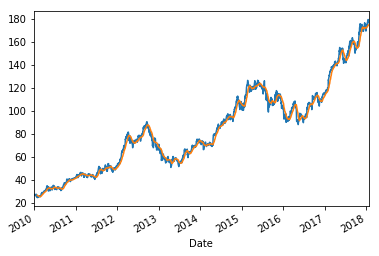

In [86]:
df["Adj Close"].plot()
df["Adj Close"].rolling(20).mean().plot()

算月 (20 天)、年 (240 天) 的移動平均。

In [92]:
df["MA20"] = df["Adj Close"].rolling(20).mean()

In [93]:
df["MA240"] = df["Adj Close"].rolling(240).mean()

我們只取近兩年的資料來分析。

In [94]:
dfs = df[["Adj Close", "MA20", "MA240"]][-480:]

為了方便, 把調整收盤改收盤。然後你會發現要把一行改名不太容易...

In [95]:
dfs.columns

Index(['Adj Close', 'MA20', 'MA240'], dtype='object')

不只要改那行, 不改那行也要寫出來!

In [96]:
dfs.columns = ['Close', 'MA20', 'MA240']

In [97]:
dfs.head()

,Close,MA20,MA240
Date,,,
2016-02-29,93.593727,92.605402,111.422970
2016-03-01,97.310738,92.829025,111.319712
2016-03-02,97.523712,93.157165,111.221182
2016-03-03,98.249687,93.431586,111.132012
2016-03-04,99.711334,93.741822,111.043746


畫出圖來, 這樣是不是更有 fu?

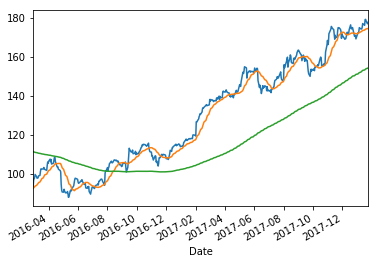

In [98]:
dfs.Close.plot()
dfs.MA20.plot()
dfs.MA240.plot()

## 12. 台股也可以!!

我們可以發現讀台股資料也可以, 比如說台積電。

In [99]:
df = pdr.get_data_yahoo("2330.TW")

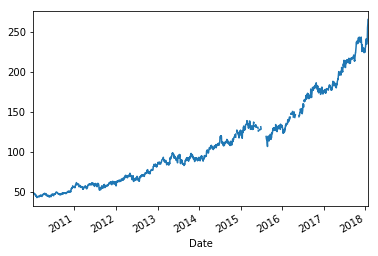

In [100]:
df["Adj Close"].plot()

是不是很感人... 等等, 怎麼好像有些地方斷掉, 是錯覺嗎?

In [101]:
df[df["Adj Close"].isnull()]

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-11-07,NaN,NaN,NaN,NaN,NaN,NaN
2014-11-14,NaN,NaN,NaN,NaN,NaN,NaN
2014-11-17,NaN,NaN,NaN,NaN,NaN,NaN
2014-11-20,NaN,NaN,NaN,NaN,NaN,NaN
2014-11-21,NaN,NaN,NaN,NaN,NaN,NaN
2014-11-24,NaN,NaN,NaN,NaN,NaN,NaN
2014-11-25,NaN,NaN,NaN,NaN,NaN,NaN
2014-11-26,NaN,NaN,NaN,NaN,NaN,NaN
2015-04-16,NaN,NaN,NaN,NaN,NaN,NaN


結果不是錯覺! 我們來當駝鳥, 把缺資料的都刪去!

In [102]:
df.dropna(inplace=True)

於是「正常」了。當然, 找牢靠的資料庫才是正途...

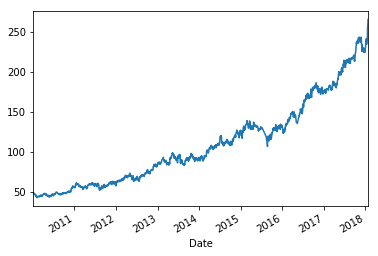

In [103]:
df["Adj Close"].plot()